In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2,os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model

In [3]:
# data_path = '/content/drive/MyDrive/processed'
data_path = '/content/drive/MyDrive/IPCVProjectData/categories/processed'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'processed_normal': 0, 'processed_stone': 1, 'processed-tumor': 2}
['processed_normal', 'processed_stone', 'processed-tumor']
[0, 1, 2]


In [4]:
img_size = 150
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path,category) 
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print("Exception: ",e)

In [5]:
data = np.array(data)/255.0  #data values are normalized
#reshaping of data                                                
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)
new_target = np_utils.to_categorical(target)
#saving the files                                
np.save('data',data)
np.save('target',new_target)

In [24]:
data = np.load('data.npy')
target = np.load('target.npy')
model = Sequential()
model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 100)     1000      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 100)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 100)      0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 240100)            0         
                                                                 
 dropout_4 (Dropout)         (None, 240100)            0         
                                                                 
 dense_8 (Dense)             (None, 50)                12005050  
                                                      

In [25]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [26]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose = 0, save_best_only = True,mode='auto')
history = model.fit(train_data,train_target,epochs = 15, callbacks = [checkpoint], validation_split = 0.2)

Epoch 1/15
110/110 [==============================] - 93s 834ms/step - loss: 0.2654 - acc: 0.8967 - val_loss: 0.1030 - val_acc: 0.9668
Epoch 2/15
110/110 [==============================] - 94s 858ms/step - loss: 0.0670 - acc: 0.9808 - val_loss: 0.0674 - val_acc: 0.9760
Epoch 3/15
110/110 [==============================] - 92s 833ms/step - loss: 0.0239 - acc: 0.9934 - val_loss: 0.0560 - val_acc: 0.9840
Epoch 4/15
110/110 [==============================] - 91s 828ms/step - loss: 0.0142 - acc: 0.9963 - val_loss: 0.0317 - val_acc: 0.9908
Epoch 5/15
110/110 [==============================] - 87s 795ms/step - loss: 0.0101 - acc: 0.9980 - val_loss: 0.0362 - val_acc: 0.9897
Epoch 6/15
110/110 [==============================] - 95s 861ms/step - loss: 0.0041 - acc: 0.9994 - val_loss: 0.0424 - val_acc: 0.9897
Epoch 7/15
110/110 [==============================] - 94s 852ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0292 - val_acc: 0.9931
Epoch 8/15
110/110 [==============================] - 9

In [27]:
print(model.evaluate(test_data,test_target))

35/35 [==============================] - 6s 162ms/step - loss: 0.0338 - acc: 0.9945
[0.03378056362271309, 0.9945105314254761]


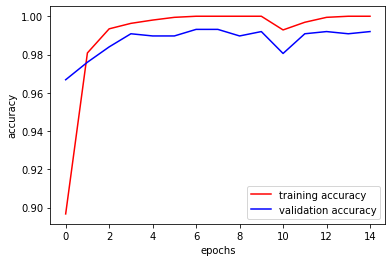

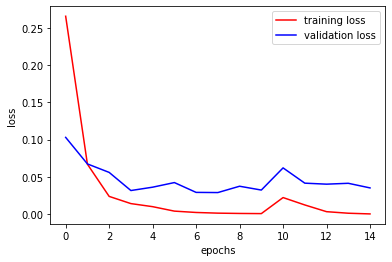

In [28]:
plt.plot(history.history['acc'],'r',label='training accuracy')
tacc=[]
vacc=[]
for i in history.history['acc']:
  tacc.append(i-15)

for i in history.history['val_acc']:
  tacc.append(i-15)


plt.plot(history.history['val_acc'],'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
from keras.models import Model
model.save("cnn_15ep.h5")